In [30]:
import pandas as pd


In [31]:
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [32]:
pumpkins.isnull().sum()


City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [33]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select] # Select selected cols only
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [34]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})


In [35]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [37]:
new_pumpkins.reset_index(drop=True)


,Month,Package,Low Price,High Price,Price
0,9,1 1/9 bushel cartons,15.00,15.0,13.50
1,9,1 1/9 bushel cartons,18.00,18.0,16.20
2,10,1 1/9 bushel cartons,18.00,18.0,16.20
3,10,1 1/9 bushel cartons,17.00,17.0,15.30
4,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
410,9,1/2 bushel cartons,15.00,15.0,30.00
411,9,1/2 bushel cartons,13.75,15.0,28.75
412,9,1/2 bushel cartons,10.75,15.0,25.75
413,9,1/2 bushel cartons,12.00,12.0,24.00


In [41]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


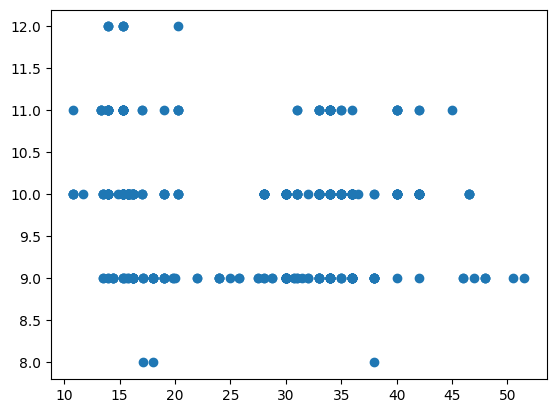

In [42]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Month
8     24.366667
9     28.544384
10    28.355244
11    25.067213
12    15.412500
Name: Price, dtype: float64


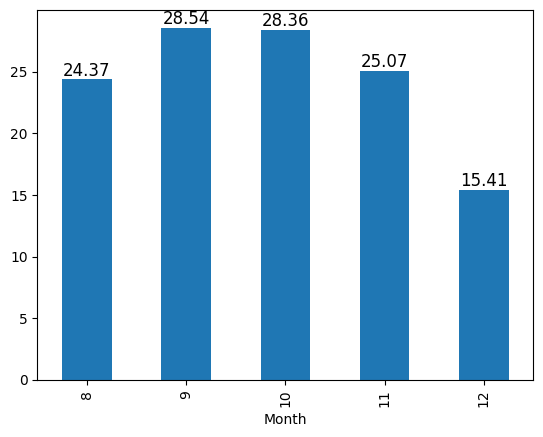

In [79]:
grouped_pumpkin_price=new_pumpkins.groupby(['Month'])['Price'].mean()
ax=grouped_pumpkin_price.plot(kind='bar')
print(grouped_pumpkin_price)
# Iter through all bars in the graph, and add annotation to the top of the bar.
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)), (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom', fontsize=12)